# Задание 1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


**Ответ:** Он оценил априорную вероятность, а должен был апостериорную относительно числа убийств людьми с этим видом крови.

# Задание 2

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у $10000$ из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью $0.01$%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить. 

**Ответ:** он оценил условную вероятность по группе крови, а должен был апостериорную.

# Задание 3. Пример с тестом на коронавирус

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет $1$% населения, а тест имеет вероятность ошибки $5$% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около $16$%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


$\theta = \{\theta_1, \theta_0\}$, где $\theta_1$ — болеет, $\theta_0$ — не болеет

$\tau = \{\tau_1, \tau_0\}$, где $\tau_1$ — тест (+), $\tau_0$ — тест (-)

$P(\tau_1 | \theta_1) = 0.95$ (хотим увеличить) **ИЛИ** $P(\tau_1 | \theta_0) = 0.05$ (хотим уменьшить)

$$P (\theta_1 | \tau_1) = \frac{(1-\color{red}{P(\tau_1|\theta_0)})\cdot P(\theta_1)}
                             {(1-\color{red}{P(\tau_1|\theta_0)})\cdot P(\theta_1) + \color{red}{P(\tau_1|\theta_0)}\cdot P(\theta_0)}$$

$$P (\theta_1 | \tau_0) = \frac{\color{red}{P(\tau_0|\theta_1)} \cdot P(\theta_1)}
                             {\color{red}{P(\tau_0|\theta_1)}\cdot P(\theta_1) + 
                             (1 - \color{red}{P(\tau_0|\theta_1)})\cdot P(\theta_0)}$$

+ prior_prob   — $P(\theta_1) = 0.01 = const$
+ fp — $\color{red}{P(\tau_1|\theta_0)}$ (default — 0.05)
+ fn — $\left(1 - \color{red}{P(\tau_0|\theta_1)} \right)$ (default — 0.05)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

figsize = (15,8)
legend_fontsize = 16

In [27]:
## если data = 1, тест положительный
def compute_posterior(data, prior_prob=0.01, fp=0.05, fn=0.05):
    if data == 1:
        '''P(\theta_1 | \tau_1)'''
        p_theta1 = prior_prob
        p_theta0 = 1 - prior_prob
        p_tau1_theta0 = fp
        p_tau1 = (1 - p_tau1_theta0) * p_theta1 + p_tau1_theta0 * p_theta0
        return ((1 - p_tau1_theta0) * p_theta1) / p_tau1
    
    elif data == 0:
        '''P(\theta_1 | \tau_0)'''
        p_theta1 = prior_prob
        p_theta0 = 1 - prior_prob
        p_tau0_theta1 = fn
        p_tau0 = p_tau0_theta1 * p_theta1 + (1 - p_tau0_theta1) * p_theta0
        return (p_tau0_theta1 * p_theta1) / p_tau0
    
    else:
        return None

In [36]:
print("Апостериорная вероятность после положительного теста: %.6f" % compute_posterior(1) )
print("Апостериорная вероятность после отрицательного теста: %.6f" % compute_posterior(0) )

vector_posterior = np.vectorize(compute_posterior, excluded=['data'])
xs = np.arange(0, 0.06, 0.01)
ys_one = vector_posterior(1, fp=xs)
ys_zero = vector_posterior(0, fn=xs)

# check that's all fine
# 0.161017
# 0.000531

Апостериорная вероятность после положительного теста: 0.161017
Апостериорная вероятность после отрицательного теста: 0.000531


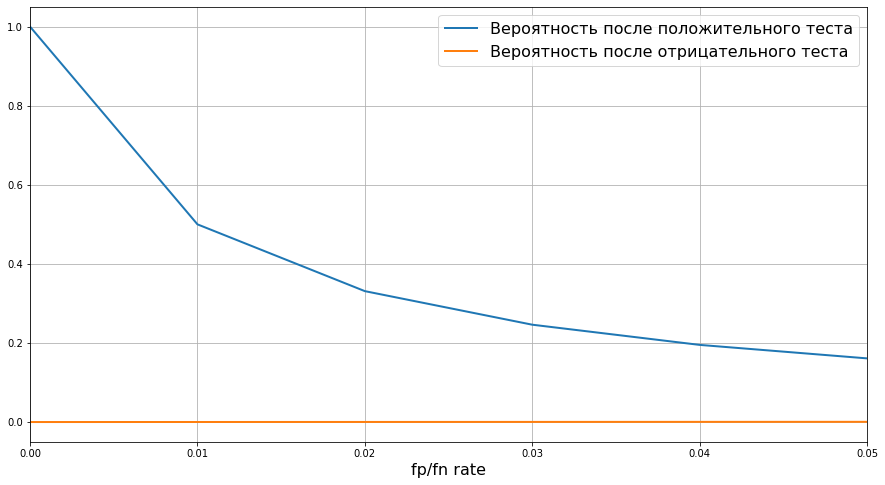

In [48]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.grid()
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательного теста')

ax.set_xlim((0.0, 0.05))
ax.set_xlabel('fp/fn rate', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)

# fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

**Построим отдельно графики, чтобы увидеть "реальный" масштаб**

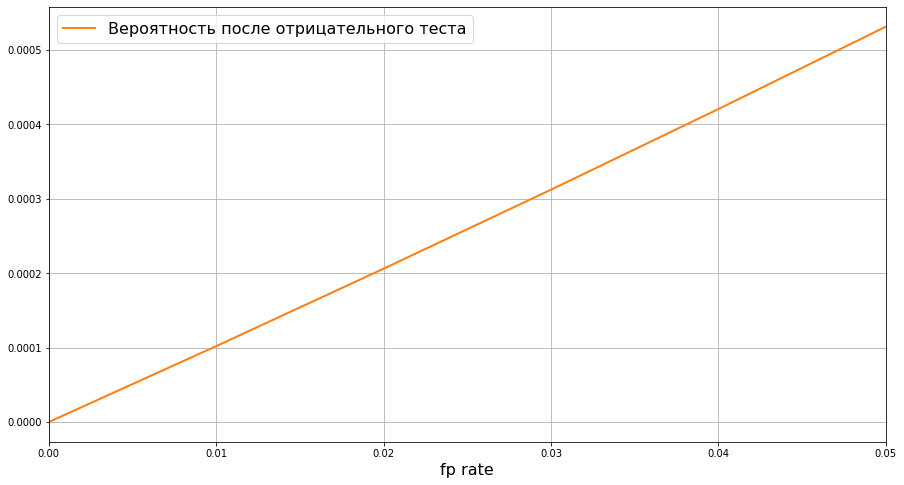

In [46]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательного теста', color = 'C1')
ax.grid()
ax.set_xlim((0.0, 0.05))
ax.set_xlabel('fp rate', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)

# fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

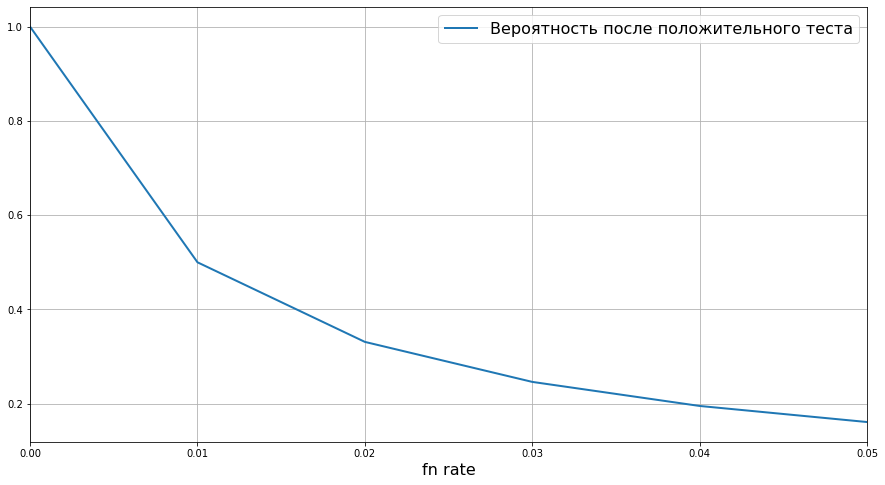

In [47]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.grid()
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста')
# ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательного теста')

ax.set_xlim((0.0, 0.05))
ax.set_xlabel('fn rate', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)

# fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

**Видно, что при малейшем увелечении $P(\tau_1 | \theta_1)$ (то есть уменьшении fn rate) апостериорная вероятность становится значительно больше**